**Web Scrapping**

In [ ]:
# Import packages
!pip install praw
import requests
import pandas as pd
import praw

# Use my Reddit API credentials
dataisbeautiful_comments = praw.Reddit(client_id='edS45MUw4FrMIqpjgX4ZSg', client_secret='YpaoiOkXLBKbcHH_X4po_kM96Dx4vA', user_agent='Scrapping_301')

# See the URL of the post
url = "https://www.reddit.com/r/dataisbeautiful/comments/hni7zy/us_college_tuition_fees_vs_overall_inflation_oc/"

# Let's create a submission object
submission_object = dataisbeautiful_comments.submission(url=url)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# See the number of comments of the post
submission_object.num_comments 

5134

In [ ]:
# Importing needed function from praw package
from praw.models import MoreComments			

# Create an empty list and retrieve all of the remaining comments
comments_posted = []													
submission_object.comments.replace_more(limit=None)

# Initiate a for loop 
for comment in submission_object.comments.list():				
	if type(comment) == MoreComments:				
		continue

# Add the comment ID, comment score (number of upvotes), the date created, and comment text to the empty list
	comments_posted.append([comment.id, comment.ups, comment.created_utc, comment.body])		

# Creating a dataframe and naming the column
comments_data = pd.DataFrame(comments_posted, columns=['ID','Score(UPs)','Date Created','Text'])
comments_data

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,ID,Score(UPs),Date Created,Text
0,fxbmwia,1042,1.594223e+09,Any specific reason this starts in 1980?
1,fxbf5jn,7322,1.594219e+09,A lot of colleges are going back online only.....
2,fxbl562,5153,1.594222e+09,This is all incentivized by the government. Th...
3,fxbu5u4,1605,1.594227e+09,[deleted]
4,fxbsk29,612,1.594226e+09,Tuition really started soaring when student lo...
...,...,...,...,...
4862,fxlm4az,1,1.594437e+09,1) You're the one disingenuous since you faile...
4863,fxlvtdg,1,1.594443e+09,"You support slave labour and are racist, that'..."
4864,fxlww1o,1,1.594444e+09,Me: \*cites 100s of statistics and facts dispr...
4865,fxlz2ho,0,1.594445e+09,You advocate for the use of massively underpai...


In [ ]:
# Converting time and date to easily readable format
from datetime import datetime

# Generate all the time details (with specific time)
comments_data['date_time'] = pd.to_datetime(comments_data['Date Created'],  unit='s')    

# Generate a column with only the data 
comments_data['date'] = comments_data['date_time'].dt.strftime('%Y-%m-%d') 

# Check the first 5 rows of the adjusted dataset
comments_data.head()

,ID,Score(UPs),Date Created,Text,date_time,date
0,fxbmwia,1042,1.594223e+09,Any specific reason this starts in 1980?,2020-07-08 15:46:35,2020-07-08
1,fxbf5jn,7322,1.594219e+09,A lot of colleges are going back online only.....,2020-07-08 14:42:15,2020-07-08
2,fxbl562,5153,1.594222e+09,This is all incentivized by the government. Th...,2020-07-08 15:32:25,2020-07-08
3,fxbu5u4,1605,1.594227e+09,[deleted],2020-07-08 16:43:33,2020-07-08
4,fxbsk29,612,1.594226e+09,Tuition really started soaring when student lo...,2020-07-08 16:31:02,2020-07-08


In [ ]:
# Deleting duplicate rows
final_tuition_data = comments_data
final_tuition_data.drop_duplicates(subset = 'Text', keep = 'last', inplace=True)

# Saving the data to CSV file
final_tuition_data.to_csv('reddit_tuition_comments.csv', index = True, header = True) 

# Check how many data remaining after cleaning
final_tuition_data.shape

(4695, 6)

**Sentiment Analysis**

**1. Import the dataset**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import the comment dataset that scraped from Reddit
# https://www.reddit.com/r/dataisbeautiful/comments/hni7zy/us_college_tuition_fees_vs_overall_inflation_oc/
reddit_tuition_comments = pd.read_csv('reddit_tuition_comments.csv') 
reddit_tuition_comments.head()

,Unnamed: 0,ID,Score(UPs),Date Created,Text,date_time,date
0,0,fxbmwia,1042,1.594223e+09,Any specific reason this starts in 1980?,2020-07-08 15:46:35,2020-07-08
1,1,fxbf5jn,7322,1.594219e+09,A lot of colleges are going back online only.....,2020-07-08 14:42:15,2020-07-08
2,2,fxbl562,5153,1.594222e+09,This is all incentivized by the government. Th...,2020-07-08 15:32:25,2020-07-08
3,4,fxbsk29,612,1.594226e+09,Tuition really started soaring when student lo...,2020-07-08 16:31:02,2020-07-08
4,5,fxbkmis,357,1.594222e+09,it's ironic how data can be beautiful... when ...,2020-07-08 15:28:15,2020-07-08


**2.Pre-processing of the data**

In [ ]:
# View the columns
reddit_tuition_comments.columns

Index(['Unnamed: 0', 'ID', 'Score(UPs)', 'Date Created', 'Text', 'date_time',
       'date'],
      dtype='object')

In [ ]:
# Remove unnecessary column
tuition_comments = reddit_tuition_comments.drop(columns = ['Unnamed: 0', 'Date Created','date'], axis = 1)

# Check the first five rows of the dataset
tuition_comments.head()

,ID,Score(UPs),Text,date_time
0,fxbmwia,1042,Any specific reason this starts in 1980?,2020-07-08 15:46:35
1,fxbf5jn,7322,A lot of colleges are going back online only.....,2020-07-08 14:42:15
2,fxbl562,5153,This is all incentivized by the government. Th...,2020-07-08 15:32:25
3,fxbsk29,612,Tuition really started soaring when student lo...,2020-07-08 16:31:02
4,fxbkmis,357,it's ironic how data can be beautiful... when ...,2020-07-08 15:28:15


In [ ]:
# Remove unnecessary symbols and stopwords
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Do the text cleaning 
def reddit_clean (redd):
    redd = str(redd).lower()
    redd = re.sub("'", "", redd) 
    redd = re.sub("@[A-Za-z0-9_]+","", redd)
    redd = re.sub("#[A-Za-z0-9_]+","", redd)
    redd = re.sub(r"www.\S+", "", redd)
    redd = re.sub(r"http\S+", "", redd)
    redd = re.sub('[()!?]', ' ', redd)
    redd = re.sub('\[.*?\]',' ', redd)
    redd = re.sub("[^a-z0-9]"," ", redd)
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)
    redd = redd.split()
    stopwords = STOPWORDS
    redd = [w for w in redd if not w in stopwords]
    redd = " ".join(word for word in redd)
    return redd

# Get the cleaned version of comments
tuition_comments['Text'] = tuition_comments['Text'].apply(reddit_clean)

# Check the first five rows of the dataset
tuition_comments.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Score(UPs),Text,date_time
0,fxbmwia,1042,specific reason starts 1980,2020-07-08 15:46:35
1,fxbf5jn,7322,colleges going back online many giving discoun...,2020-07-08 14:42:15
2,fxbl562,5153,incentivized government government gives loan ...,2020-07-08 15:32:25
3,fxbsk29,612,tuition really started soaring student loans b...,2020-07-08 16:31:02
4,fxbkmis,357,ironic data beautiful always shows ugliness,2020-07-08 15:28:15


In [ ]:
# Tokenize the comments for later use
tokenized_tuition_comments = tuition_comments['Text'].apply(lambda x: x.split())
print(tokenized_tuition_comments)

0                        [specific, reason, starts, 1980]
1       [colleges, going, back, online, many, giving, ...
2       [incentivized, government, government, gives, ...
3       [tuition, really, started, soaring, student, l...
4       [ironic, data, beautiful, always, shows, uglin...
                              ...                        
4690    [youre, disingenuous, since, failed, provide, ...
4691    [support, slave, labour, racist, thats, youve,...
4692    [cites, 100s, statistics, facts, disproving, i...
4693    [advocate, massively, underpaid, migratory, la...
4694    [advocate, free, trade, exports, imports, with...
Name: Text, Length: 4695, dtype: object


In [ ]:
# Stemming the data
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenized_tuition_comments = tokenized_tuition_comments.apply(lambda x: [stemmer.stem(i) for i in x])

# Add one more column to the cleaned dataset, including the tokenized and stemmed comments
tuition_comments['Tokenized']= tokenized_tuition_comments

# Check the first five rows of the dataset
tuition_comments.head()

,ID,Score(UPs),Text,date_time,Tokenized
0,fxbmwia,1042,specific reason starts 1980,2020-07-08 15:46:35,"[specif, reason, start, 1980]"
1,fxbf5jn,7322,colleges going back online many giving discoun...,2020-07-08 14:42:15,"[colleg, go, back, onlin, mani, give, discount..."
2,fxbl562,5153,incentivized government government gives loan ...,2020-07-08 15:32:25,"[incentiv, govern, govern, give, loan, exorbit..."
3,fxbsk29,612,tuition really started soaring student loans b...,2020-07-08 16:31:02,"[tuition, realli, start, soar, student, loan, ..."
4,fxbkmis,357,ironic data beautiful always shows ugliness,2020-07-08 15:28:15,"[iron, data, beauti, alway, show, ugli]"


**3. Word cloud; Word count; Frequency bar chart**

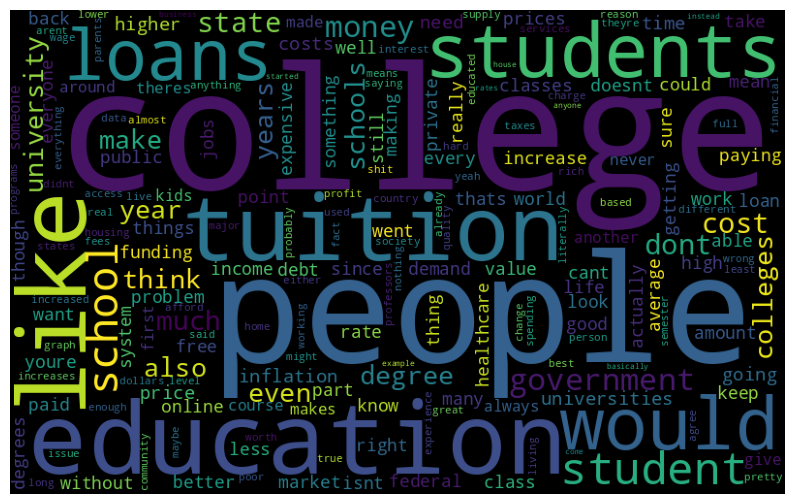

In [ ]:
# Make a word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

# Count the words in Text
all_words_Text = ' '.join([text for text in tuition_comments['Text']])
count_word_Text = collections.Counter(all_words_Text.split())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(count_word_Text)
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)
plt.axis("off") # Remove the axis
plt.show()

In [ ]:
# Count the frequency of the words in Text
import itertools
import collections
count_word_Text = collections.Counter(all_words_Text.split())

# Show the ten most frequent words in Text
count_word_Text.most_common(10)

[('college', 1374),
 ('people', 1047),
 ('education', 998),
 ('like', 875),
 ('tuition', 847),
 ('students', 842),
 ('would', 805),
 ('loans', 742),
 ('student', 739),
 ('school', 684)]

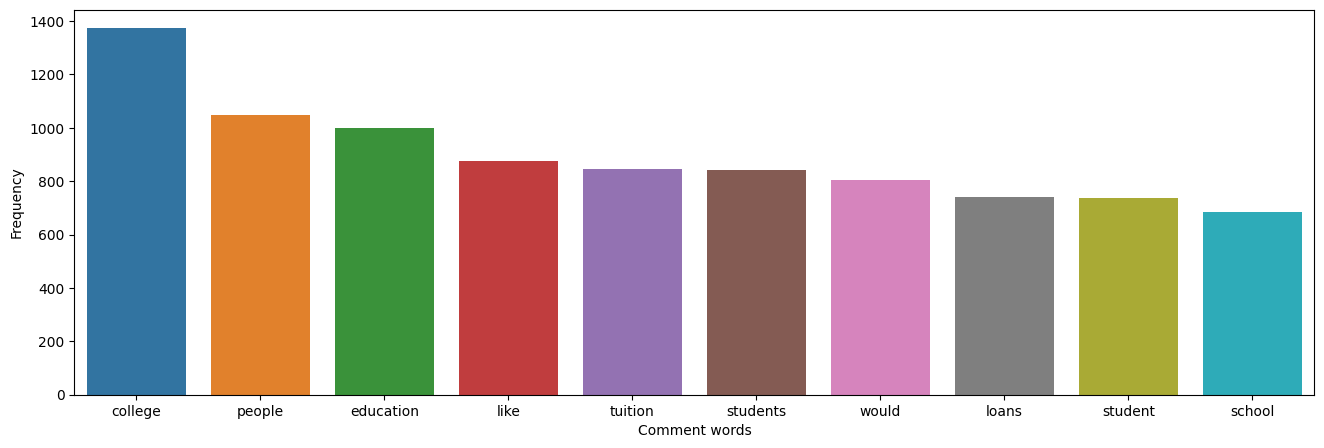

In [ ]:
# Make a bar chart for the ten most frequent neutral words in comments

# Creates a frequency distribution object
a = nltk.FreqDist(count_word_Text) 

# Extract the keys and values from a
d = pd.DataFrame({'Comment words': list(a.keys()), # Extract the keys and values from a
                  'Frequency': list(a.values())})  

# Select the ten most frequent words
d = d.nlargest(columns="Frequency", n = 10) # Select the ten most frequent words

# Make the bar chart
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Comment words", y = "Frequency")
ax.set(ylabel = 'Frequency')
plt.show()

**4.Sentiment analysis**

In [ ]:
# Do the sentiment analysis
from textblob import TextBlob

# Report the polarity of the comments, range from 1 to -1 (-1 as negative statements; 1 as positive statements)
tuition_comments['polarity'] = tuition_comments['Text'].apply(lambda z: TextBlob(z).sentiment.polarity)

# Report the subjectivity of the comments, range from 0 to 1 (0 as an objective statement; 1 as a highly subjective statement)
tuition_comments['subjectivity'] = tuition_comments['Text'].apply(lambda y: TextBlob(y).sentiment.subjectivity)

# Check the first five rows
tuition_comments.head()

,ID,Score(UPs),Text,date_time,Tokenized,polarity,subjectivity
0,fxbmwia,1042,specific reason starts 1980,2020-07-08 15:46:35,"[specif, reason, start, 1980]",0.000000,0.125000
1,fxbf5jn,7322,colleges going back online many giving discoun...,2020-07-08 14:42:15,"[colleg, go, back, onlin, mani, give, discount...",0.113095,0.359524
2,fxbl562,5153,incentivized government government gives loan ...,2020-07-08 15:32:25,"[incentiv, govern, govern, give, loan, exorbit...",0.100000,0.066667
3,fxbsk29,612,tuition really started soaring student loans b...,2020-07-08 16:31:02,"[tuition, realli, start, soar, student, loan, ...",0.350000,0.450000
4,fxbkmis,357,ironic data beautiful always shows ugliness,2020-07-08 15:28:15,"[iron, data, beauti, alway, show, ugli]",0.250000,0.766667


In [ ]:
# Classify the comments by polarity
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity 
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

In [ ]:
# Create a column in the dataset to report the sentiment based on their polarity
tuition_comments['sentiment'] = tuition_comments['Text'].apply(analyze_sentiment)

# Create a column in the dataset to report the subjectivity level
tuition_comments['subjectivity_class'] = np.where(tuition_comments['subjectivity'] > 0.5, 'Subjective', 'Objective')

# Chech the first five rows
tuition_comments.head()

,ID,Score(UPs),Text,date_time,Tokenized,polarity,subjectivity,sentiment,subjectivity_class
0,fxbmwia,1042,specific reason starts 1980,2020-07-08 15:46:35,"[specif, reason, start, 1980]",0.000000,0.125000,Neutral Sentiment,Objective
1,fxbf5jn,7322,colleges going back online many giving discoun...,2020-07-08 14:42:15,"[colleg, go, back, onlin, mani, give, discount...",0.113095,0.359524,Positive Sentiment,Objective
2,fxbl562,5153,incentivized government government gives loan ...,2020-07-08 15:32:25,"[incentiv, govern, govern, give, loan, exorbit...",0.100000,0.066667,Positive Sentiment,Objective
3,fxbsk29,612,tuition really started soaring student loans b...,2020-07-08 16:31:02,"[tuition, realli, start, soar, student, loan, ...",0.350000,0.450000,Positive Sentiment,Objective
4,fxbkmis,357,ironic data beautiful always shows ugliness,2020-07-08 15:28:15,"[iron, data, beauti, alway, show, ugli]",0.250000,0.766667,Positive Sentiment,Subjective


**5. Frequency tables; Descriptive statistics; Crosstab**

In [ ]:
# Classify the positive, negative, and neutral sentiment
sf = tuition_comments.sentiment.value_counts()
sentiment_frequency = pd.DataFrame({'Count': sf})
sentiment_frequency.index.name = 'Category'
print(sentiment_frequency)

                    Count
Category                 
Positive Sentiment   2466
Negative Sentiment   1154
Neutral Sentiment    1075


In [ ]:
# Classify the objective and subjective category
ss = tuition_comments.subjectivity_class.value_counts()
subjectivity_frequency = pd.DataFrame({'Count': ss})
subjectivity_frequency.index.name = 'Category'
print(subjectivity_frequency)

            Count
Category         
Objective    2957
Subjective   1738


In [ ]:
# Make a descriptive statistics of the polarity and subjectivity
polarity_subjectivity_stats = tuition_comments[["polarity", "subjectivity"]]
polarity_subjectivity_stats.describe()    

,polarity,subjectivity
count,4695.000000,4695.000000
mean,0.065706,0.410711
std,0.239356,0.273569
min,-1.000000,0.000000
25%,0.000000,0.200000
50%,0.024127,0.437500
75%,0.194291,0.598795
max,1.000000,1.000000


In [ ]:
# Make a crosstab of the polarity and subjectivity
crosstab = pd.crosstab(tuition_comments['sentiment'], tuition_comments['subjectivity_class'])
print(crosstab)

subjectivity_class  Objective  Subjective
sentiment                                
Negative Sentiment        535         619
Neutral Sentiment        1017          58
Positive Sentiment       1405        1061


**6. Exploratory analysis**

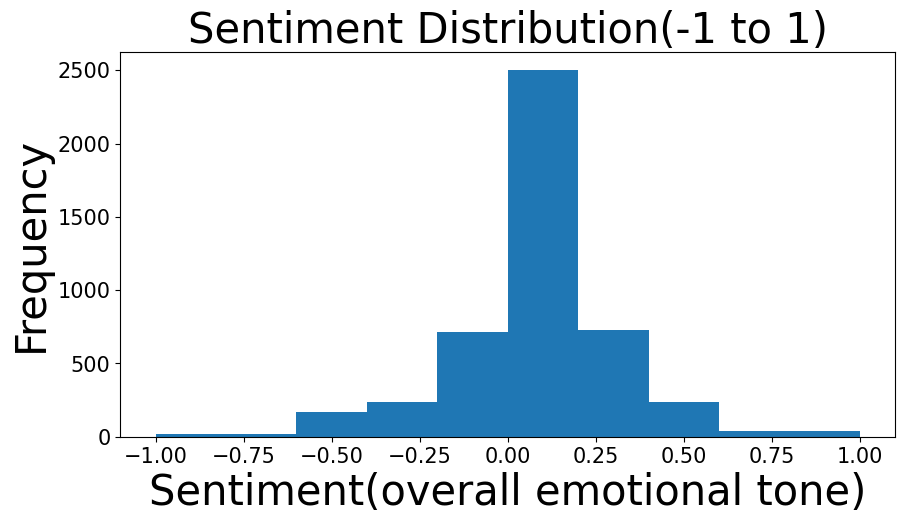

In [ ]:
# Create a histogram for sentiment
plt.figure(figsize=(10,5))
plt.xlabel('Sentiment(overall emotional tone)', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(tuition_comments['polarity'], bins=10)
plt.title('Sentiment Distribution(-1 to 1)', fontsize=30)
plt.show()

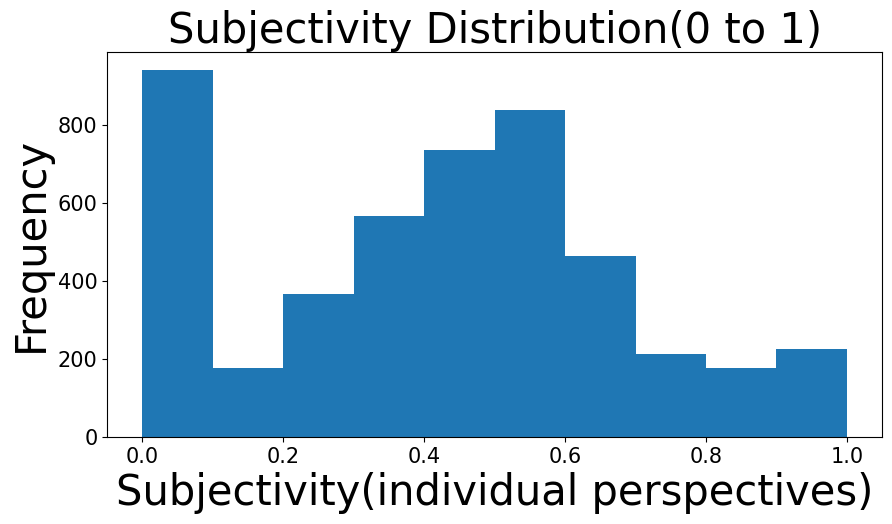

In [ ]:
# Create a histogram for subjectivity
plt.figure(figsize=(10,5))
plt.xlabel('Subjectivity(individual perspectives)', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(tuition_comments['subjectivity'], bins=10)
plt.title('Subjectivity Distribution(0 to 1)', fontsize=30)
plt.show()